In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\David gathara marigi\Downloads\housing_data_sample.csv", index_col  = "Id")

In [3]:
# use grid search

In [4]:
from sklearn.neighbors import KNeighborsRegressor

In [5]:
knn = KNeighborsRegressor() 
hyperparameters = {'n_neighbors': [3, 5, 7], 
'weights': ['uniform', 'distance'], 
'p': [1, 2]}

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
features = df.drop('SalePrice', axis=1) 
targets = df['SalePrice'] 
gs = GridSearchCV(knn, 
                  hyperparameters, 
                  scoring='neg_mean_absolute_error', 
                  n_jobs=-1) 
gs.fit(features, targets)

GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error')

In [8]:
print(gs.best_estimator_) 
print(gs.best_params_) 
print(gs.best_score_) 

KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')
{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
-30067.805981482


In [9]:
list(zip(gs.cv_results_['params'], 
gs.cv_results_['mean_test_score']))

[({'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}, -31791.80296803653),
 ({'n_neighbors': 3, 'p': 1, 'weights': 'distance'}, -31216.846162311565),
 ({'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}, -32979.52716894977),
 ({'n_neighbors': 3, 'p': 2, 'weights': 'distance'}, -32340.112686733315),
 ({'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}, -31166.12369863013),
 ({'n_neighbors': 5, 'p': 1, 'weights': 'distance'}, -30429.898579313198),
 ({'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}, -31983.19452054795),
 ({'n_neighbors': 5, 'p': 2, 'weights': 'distance'}, -31132.746789491037),
 ({'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}, -30931.227788649703),
 ({'n_neighbors': 7, 'p': 1, 'weights': 'distance'}, -30067.805981482),
 ({'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}, -32122.572113502934),
 ({'n_neighbors': 7, 'p': 2, 'weights': 'distance'}, -31028.72855465766)]

In [10]:
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint

In [11]:
hyperparameters = {'n_neighbors': randint(low=3, high=20), 
                  'weights': ['uniform', 'distance'], 
                  'p': [1, 2]} 
rs = RandomizedSearchCV(knn, 
                        hyperparameters, 
                        scoring='neg_mean_absolute_error', 
                        n_jobs=-1, 
                        random_state=42) 
rs.fit(features, targets)

RandomizedSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019A5B4B55D0>,
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='neg_mean_absolute_error')

In [12]:
print(rs.best_estimator_) 
print(rs.best_params_) 
print(rs.best_score_)

KNeighborsRegressor(n_neighbors=13, p=1, weights='distance')
{'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
-29848.315066076077


In [13]:
list(zip(rs.cv_results_['params'], 
rs.cv_results_['mean_test_score']))

[({'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}, -32364.56095890411),
 ({'n_neighbors': 17, 'p': 1, 'weights': 'distance'}, -30050.163298957068),
 ({'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}, -32364.56095890411),
 ({'n_neighbors': 13, 'p': 1, 'weights': 'distance'}, -29848.315066076077),
 ({'n_neighbors': 6, 'p': 2, 'weights': 'distance'}, -30998.68632248044),
 ({'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}, -31983.19452054795),
 ({'n_neighbors': 4, 'p': 2, 'weights': 'distance'}, -31908.18874752362),
 ({'n_neighbors': 8, 'p': 2, 'weights': 'distance'}, -31177.580573747982),
 ({'n_neighbors': 3, 'p': 2, 'weights': 'distance'}, -32340.112686733315),
 ({'n_neighbors': 14, 'p': 1, 'weights': 'uniform'}, -30984.57123287672)]

In [14]:
from skopt import BayesSearchCV 
from skopt.space import Categorical, Integer

In [15]:
hyperparameters = {'n_neighbors': Integer(3, 20), 
                  'weights': Categorical(['uniform', 
'distance']), 
                  'p': Categorical([1, 2])} 
bs = BayesSearchCV(knn, 
                   hyperparameters, 
                   scoring='neg_mean_absolute_error', 
                   n_jobs=-1, 
                   random_state=42, 
                   n_iter=10) 
bs.fit(features, targets)

BayesSearchCV(estimator=KNeighborsRegressor(), n_iter=10, n_jobs=-1,
              random_state=42, scoring='neg_mean_absolute_error',
              search_spaces={'n_neighbors': Integer(low=3, high=20, prior='uniform', transform='normalize'),
                             'p': Categorical(categories=(1, 2), prior=None),
                             'weights': Categorical(categories=('uniform', 'distance'), prior=None)})

In [16]:
print(bs.best_estimator_) 
print(bs.best_params_) 
print(bs.best_score_)

KNeighborsRegressor(n_neighbors=17, p=1, weights='distance')
OrderedDict([('n_neighbors', 17), ('p', 1), ('weights', 'distance')])
-30050.163298957068


In [17]:
from yellowbrick.model_selection import LearningCurve

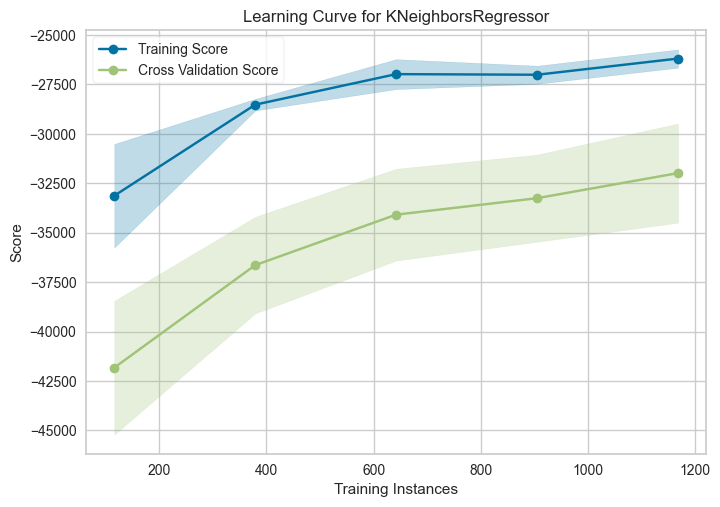

<Axes: title={'center': 'Learning Curve for KNeighborsRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [18]:
lc = LearningCurve(knn, scoring='neg_mean_absolute_error') 
lc.fit(features, targets) 
lc.show()

In [19]:
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression() 
feature_selector = RFECV(lr, 
scoring='neg_mean_absolute_error') 
feature_selector.fit(features, targets)
feature_selector.cv_results_['mean_test_score']

array([-44963.06493189, -41860.3132655 , -37319.2626792 , -33319.79319284,
       -28524.60411086, -27607.29672974, -27315.23987193])

In [21]:
features.iloc[:, feature_selector.support_]

,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF
Id,,,,,,,
1,8450,2003,2,8,548,856,854
2,9600,1976,2,6,460,1262,0
3,11250,2001,2,6,608,920,866
4,9550,1915,1,7,642,961,756
5,14260,2000,2,9,836,1145,1053
...,...,...,...,...,...,...,...
1456,7917,1999,2,7,460,953,694
1457,13175,1978,2,7,500,2073,0
1458,9042,1941,2,9,252,1188,1152


In [22]:
# using automl with pycaret

In [23]:
from pycaret.regression import setup, compare_models

In [24]:
exp_clf = setup(df, target='SalePrice') 
best = compare_models(sort='MAE')

,Description,Value
0,Session id,6837
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 8)"
4,Transformed data shape,"(1460, 8)"
5,Transformed train set shape,"(1021, 8)"
6,Transformed test set shape,"(439, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,22849.9907,1353477165.4488,36022.5057,0.7749,0.1796,0.1333,0.2320
gbr,Gradient Boosting Regressor,23117.4018,1358700707.3272,36049.4594,0.7739,0.1789,0.1346,0.1350
lightgbm,Light Gradient Boosting Machine,23169.4560,1323328605.8961,35749.5447,0.7844,0.1760,0.1327,0.2210
rf,Random Forest Regressor,23368.0764,1391676171.3543,36696.4529,0.7706,0.1806,0.1350,0.3410
xgboost,Extreme Gradient Boosting,24093.4214,1603218764.7216,39008.7311,0.7322,0.1847,0.1378,0.1050
en,Elastic Net,26972.9897,1782732553.8339,41916.3357,0.7097,0.2153,0.1564,0.0190
br,Bayesian Ridge,26973.5973,1782954094.7838,41953.3627,0.7096,0.2160,0.1565,0.0160
ridge,Ridge Regression,27080.4659,1786635575.2285,41927.4351,0.7090,0.2171,0.1575,0.0160
llar,Lasso Least Angle Regression,27081.7173,1786692074.3505,41927.9318,0.7090,0.2171,0.1576,0.0190
lasso,Lasso Regression,27081.7173,1786692073.5447,41927.9318,0.7090,0.2171,0.1576,0.0170


In [25]:
exp_clf = setup(df, 
                target='SalePrice', 
                numeric_features=['FullBath', 'TotRmsAbvGrd'])

,Description,Value
0,Session id,6970
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 8)"
4,Transformed data shape,"(1460, 8)"
5,Transformed train set shape,"(1021, 8)"
6,Transformed test set shape,"(439, 8)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [26]:
from pycaret.regression import predict_model, save_model, load_model

In [27]:
prediction_df = predict_model(best, features) 

In [28]:
save_model(best, 'catboost_regressor')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['FullBath', 'TotRmsAbvGrd'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=6837))]),
 'catboost_regressor.pkl')

In [29]:
cb_model = load_model('catboost_regressor')

Transformation Pipeline and Model Successfully Loaded


In [30]:
from pycaret.regression import tune_model

In [31]:
tuned_knn = tune_model(knn) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29469.0232,2015465970.1526,44893.9414,0.6559,0.2579,0.1993
1,40099.5391,4361115190.9315,66038.7401,0.4875,0.2933,0.2262
2,24783.2597,1207902641.8546,34754.8938,0.6571,0.2084,0.1680
3,38411.2365,4509425657.7742,67152.2573,0.4468,0.2411,0.1812
4,23713.1227,1028186081.6707,32065.3408,0.6942,0.1785,0.1501
5,30861.0741,2193618217.6071,46836.0782,0.5342,0.2418,0.1860
6,29000.5065,1653527651.0318,40663.5912,0.7256,0.2166,0.1705
7,50292.8017,7795220006.7076,88290.5431,0.3713,0.3228,0.2439
8,34065.1377,2458639861.6785,49584.6737,0.5890,0.2885,0.2301


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [32]:
from pycaret.datasets import get_data 
from pycaret.classification import models, setup

In [33]:
data = get_data('credit') 
exp = setup(data=data, target='default')
models()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


,Description,Value
0,Session id,6697
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(24000, 24)"
5,Transformed train set shape,"(16800, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True
